In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from TutorML.decomposition import LFM 

In [2]:
def load_movielens(train_path, test_path, basedir=None):
    if basedir:
        train_path = os.path.join(basedir,train_path)
        test_path = os.path.join(basedir,test_path)
    col_names = ['user_id','item_id','score','timestamp']
    use_cols = ['user_id','item_id','score']
    df_train = pd.read_csv(train_path,sep='\t',header=None,
                           names=col_names,usecols=use_cols)
    df_test = pd.read_csv(test_path,sep='\t',header=None,
                           names=col_names,usecols=use_cols)
    df_train.user_id -= 1
    df_train.item_id -= 1
    df_test.user_id -= 1
    df_test.item_id -=1
    return df_train, df_test

In [3]:
df_train, df_test = load_movielens(train_path='u1.base',test_path='u1.test',
                                   basedir='ml-100k/')

In [4]:
data = pd.concat([df_train,df_test]).reset_index().drop('index',axis=1)
n_users = data.user_id.nunique()
n_items = data.item_id.nunique()
train_idx = np.ravel_multi_index(df_train[['user_id','item_id']].values.T,
                                 dims=(n_users,n_items))
test_idx = np.ravel_multi_index(df_test[['user_id','item_id']].values.T,
                                 dims=(n_users,n_items))

In [5]:
X = np.zeros(shape=(n_users*n_items,))
mask = np.zeros(shape=(n_users*n_items))

X[train_idx] = df_train['score']
mask[train_idx] = 1
y_test = df_test.score.values.ravel()

X = X.reshape((n_users,n_items))
mask = mask.reshape((n_users, n_items))

In [6]:
"""
if you want to increace number of factors, 
you should lower the learning rate too. otherwise nan or inf may appear
"""
lfm = LFM(n_factors=2,max_iter=1000,early_stopping=50,
          learning_rate=1e-3,print_every=10)

In [7]:
lfm.fit(X,mask,test_data=(test_idx,y_test))

[Iter 010] train mse: 1.2448    test mse: 1.4701
[Iter 020] train mse: 0.9515    test mse: 1.0900
[Iter 030] train mse: 0.8885    test mse: 1.0026
[Iter 040] train mse: 0.8638    test mse: 0.9689
[Iter 050] train mse: 0.8508    test mse: 0.9527
[Iter 060] train mse: 0.8426    test mse: 0.9437
[Iter 070] train mse: 0.8367    test mse: 0.9384
[Iter 080] train mse: 0.8318    test mse: 0.9349
[Iter 090] train mse: 0.8275    test mse: 0.9324
[Iter 100] train mse: 0.8236    test mse: 0.9304
[Iter 110] train mse: 0.8217    test mse: 0.9287
[Iter 120] train mse: 0.8358    test mse: 0.9270
[Iter 130] train mse: 0.9208    test mse: 0.9260
[Iter 140] train mse: 0.9210    test mse: 0.9263
[Iter 150] train mse: 0.8372    test mse: 0.9238
[Iter 160] train mse: 0.8120    test mse: 0.9215
[Iter 170] train mse: 0.8044    test mse: 0.9204
[Iter 180] train mse: 0.8024    test mse: 0.9206
[Iter 190] train mse: 0.8031    test mse: 0.9222
[Iter 200] train mse: 0.8043    test mse: 0.9237
[Iter 210] train mse

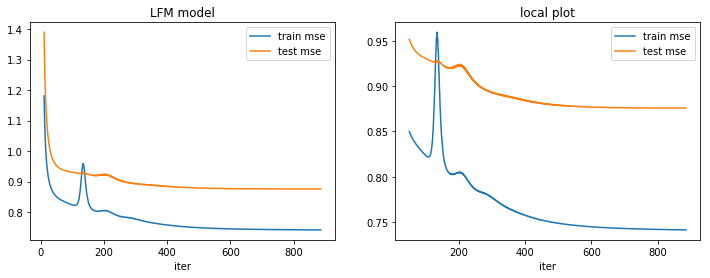

In [8]:
n_iters = lfm.n_iters
start_it = 10
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(range(start_it,n_iters), lfm.mse_history[start_it:,0],label='train mse')
plt.plot(range(start_it,n_iters), lfm.mse_history[start_it:,1],label='test mse')
plt.title('LFM model')
plt.legend()
plt.xlabel('iter')
start_it = 50
plt.subplot(122)
plt.plot(range(start_it,n_iters), lfm.mse_history[start_it:,0],label='train mse')
plt.plot(range(start_it,n_iters), lfm.mse_history[start_it:,1],label='test mse')
plt.title('local plot')
plt.legend()
plt.xlabel('iter')
plt.show()